<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Data Visualization with Seaborn</h1>
        <h1>Seaborn</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import watermark
import seaborn as sns

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: f2852833d19ef074b2e645f99831d10cf8852ccc

matplotlib: 3.3.2
watermark : 2.1.0
pandas    : 1.2.2
sklearn   : 0.24.1
json      : 2.0.9
seaborn   : 0.11.0
numpy     : 1.20.1



## Seaborn datasets

Seaborn makes a small list of datasets easily available:

In [3]:
plt.style.use('seaborn')

This makes it easier to learn how to use the library using standard data

In [4]:
tips = sns.load_dataset("tips")

The first time you load a dataset you'll need an internet connection so that the data can be downloaded from github. The **load_dataset** function returns a pandas data frame

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Scatter plot

Seaborn is designed to facilitate the use of data frames. Making an attractive scatter plot is as simple as:

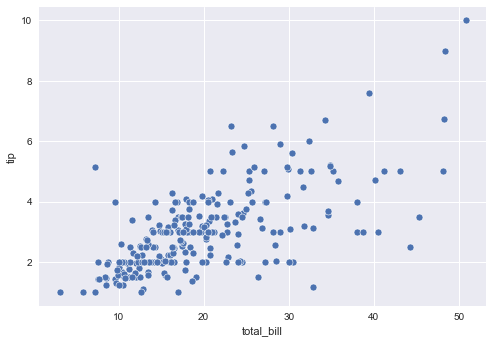

In [6]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

In [7]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

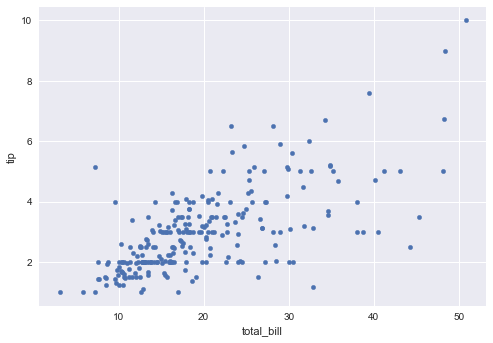

In [8]:
tips.plot.scatter(x='total_bill', y='tip')

As you can see the axis level functions return an Axis object

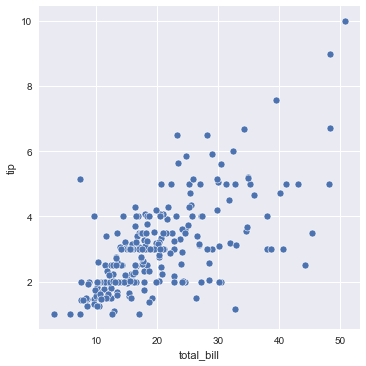

In [9]:
fg = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

In [10]:
type(fg)

seaborn.axisgrid.FacetGrid

The generic figure functions return a FacetGrid object. Making more complex figures is also very simple

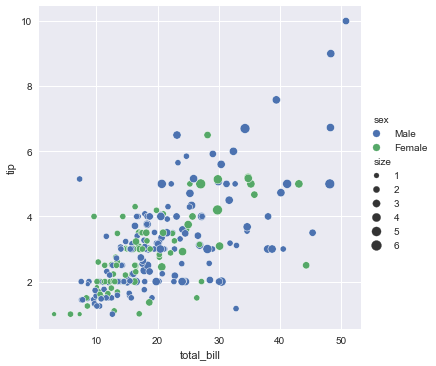

In [11]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size",
            )

And we can specify the order in which the colors are used

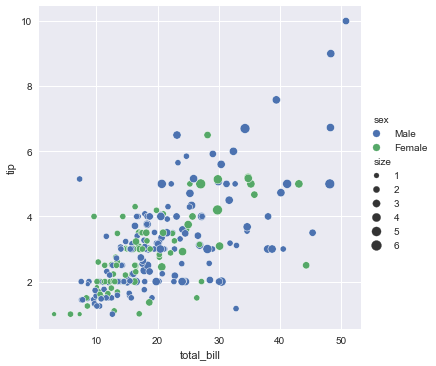

In [12]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size",
            hue_order=["Male", "Female"],  
            )

And differnet marker types, etc

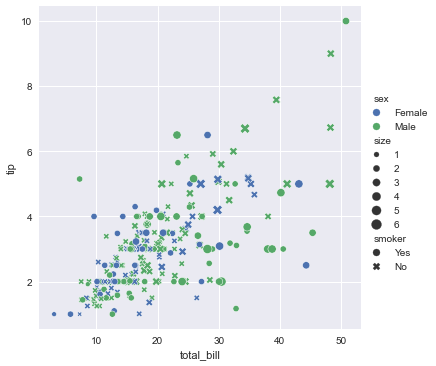

In [13]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", 
            hue_order=["Female", "Male"],  
            style='smoker',
            )

The main advantage of the figure level functions is that they can easily generate subplots covering other dimensions of the dataset

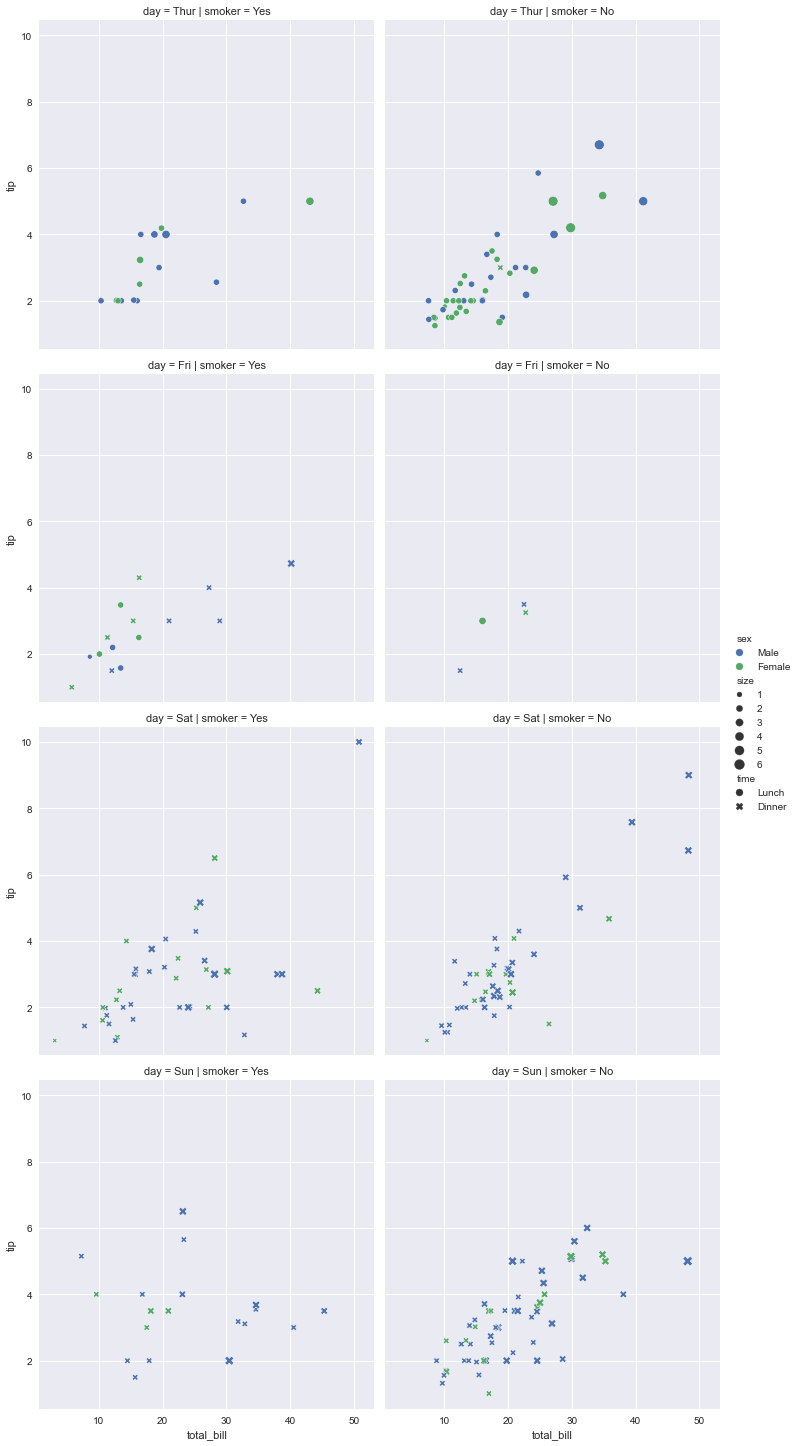

In [14]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", 
            col='smoker', row='day', style='time',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

## Categorical functions

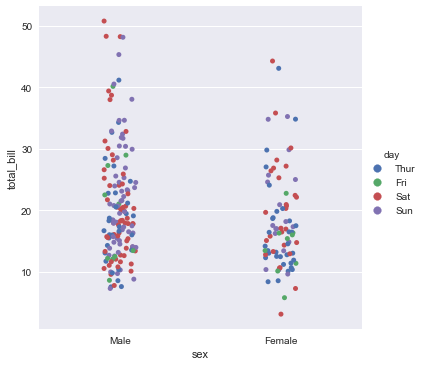

In [15]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="strip",
            hue="day")

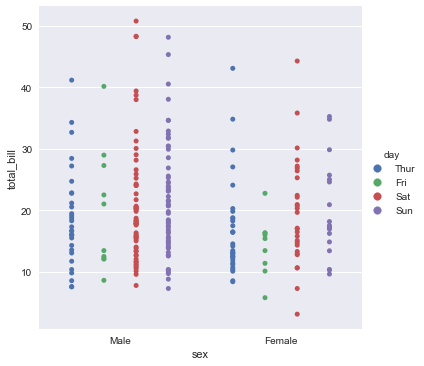

In [16]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="strip",
            hue="day", jitter=False, dodge=True)

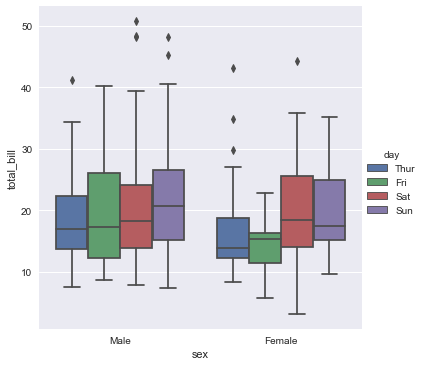

In [17]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="box",
            hue="day")

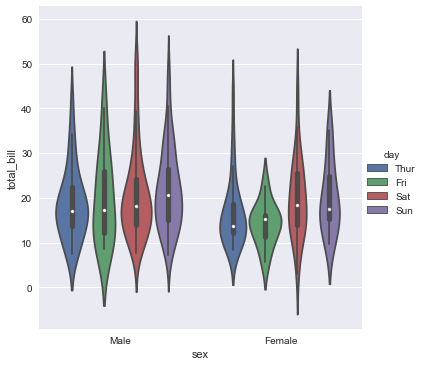

In [18]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="violin",
            hue="day")

## Axis level functions

While Figure level plots are extremely convenient for data exploration they have one fundamental limitation. Figure level functions build their own figure from scratch. This means that they are not easily stackable so you can't easily combine multiple plots on top of one another. 

This is perhaps the main reason you migth find yourself using axis level functions directly. Let's look at a quick example

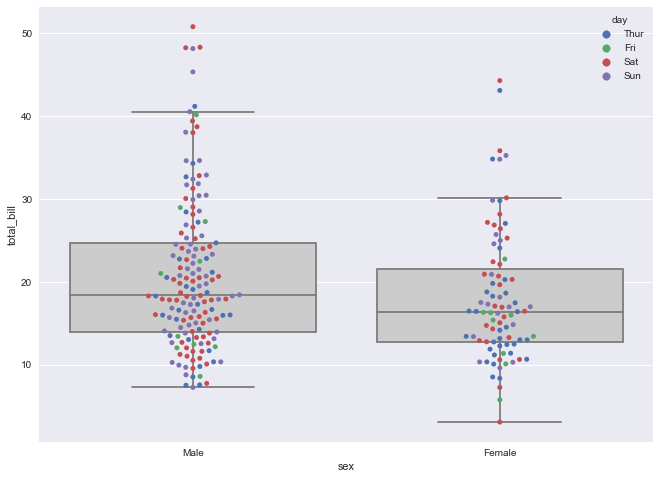

In [19]:
sns.boxplot(x="sex", y="total_bill", data=tips, color=".8", showfliers=False)
sns.swarmplot(x="sex", y="total_bill", hue="day", data=tips)
plt.gcf().set_size_inches(11, 8)

## FacetGrid

We already saw how we can easily use figure level functions to generate faceted plots

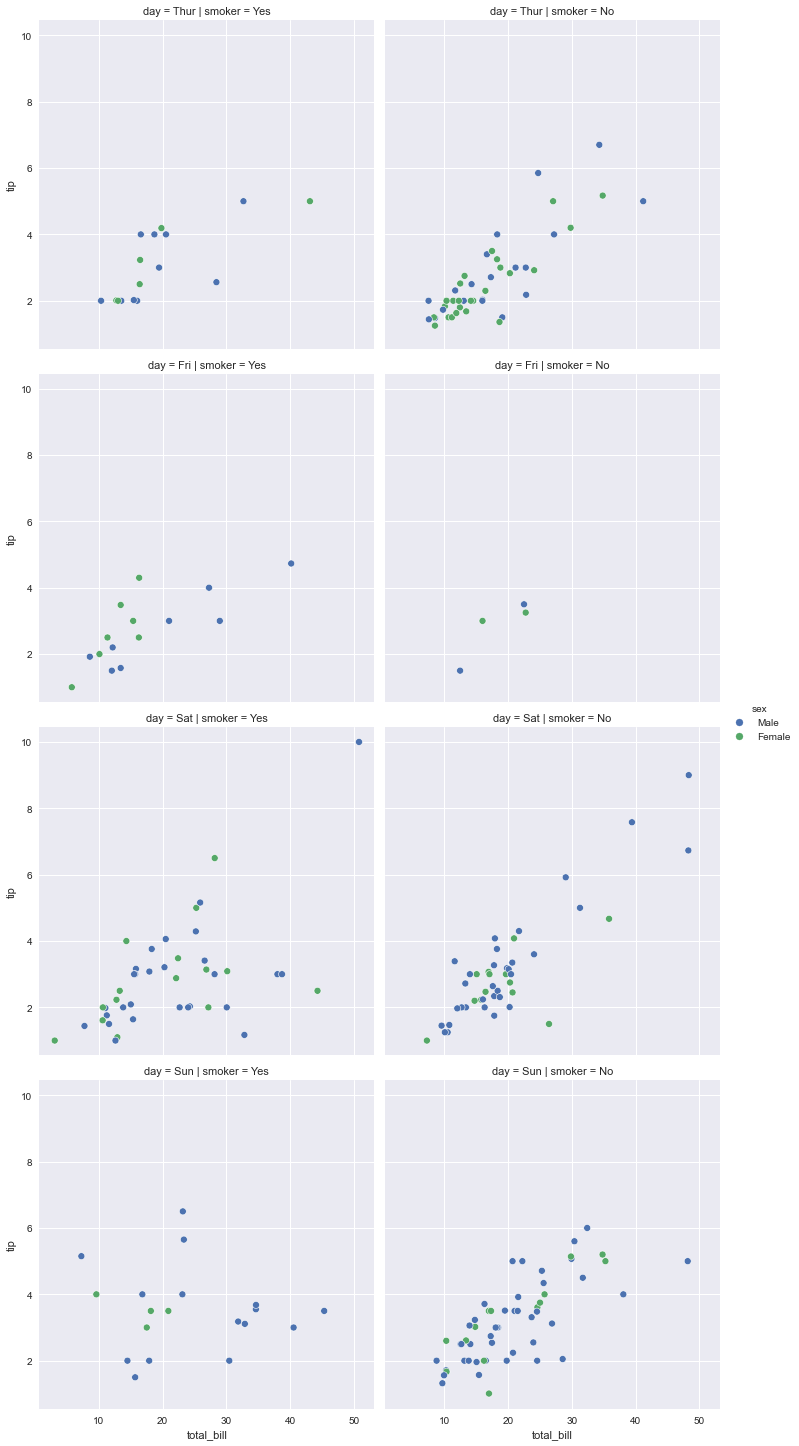

In [20]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", 
            col='smoker', row='day',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

This can also be done manually using **FacetGrid**. First we instantiate a facet 

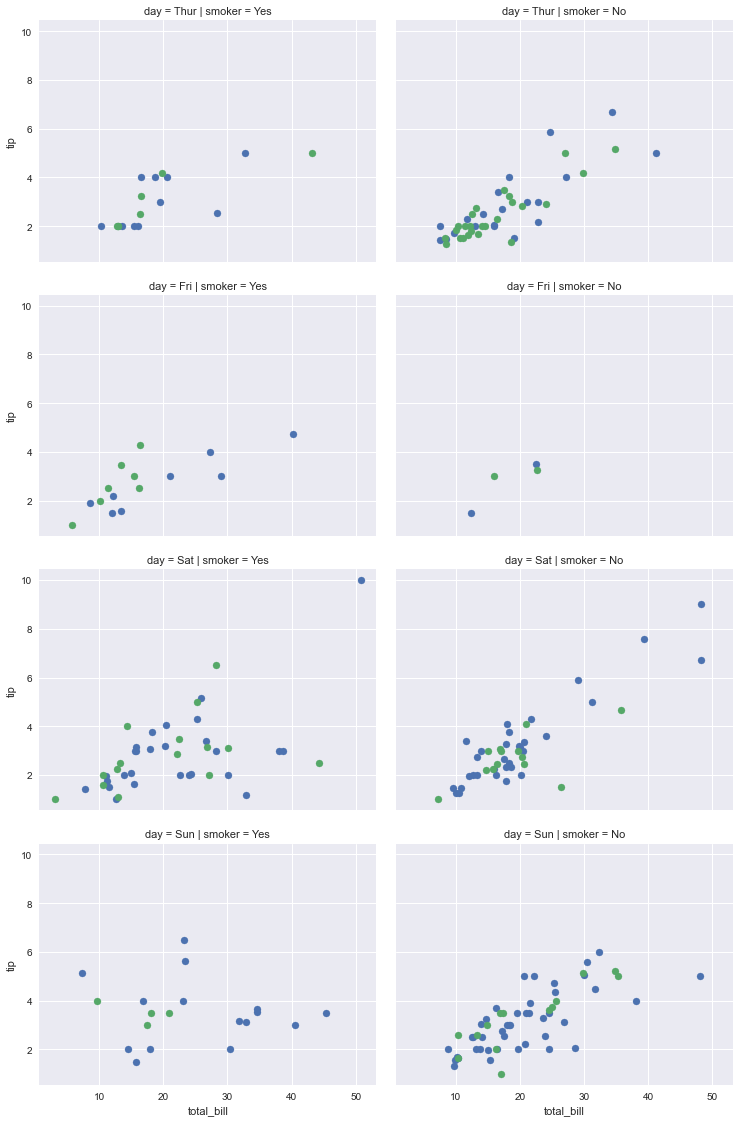

In [21]:
fg = sns.FacetGrid(tips,
            col="smoker", row="day", hue="sex", 
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )
fg.map(plt.scatter, "total_bill", "tip")
plt.gcf().set_size_inches(11, 16)

## FacetGrid with Custom functions

In [22]:
def regression(x, y, **kwargs):
    ax = plt.gca()
    lm = LinearRegression()
    lm.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    
    ax.scatter(x, y, c=[kwargs['color']])
    ax.plot(x, lm.predict(x.values.reshape(-1, 1)), c=kwargs['color'])

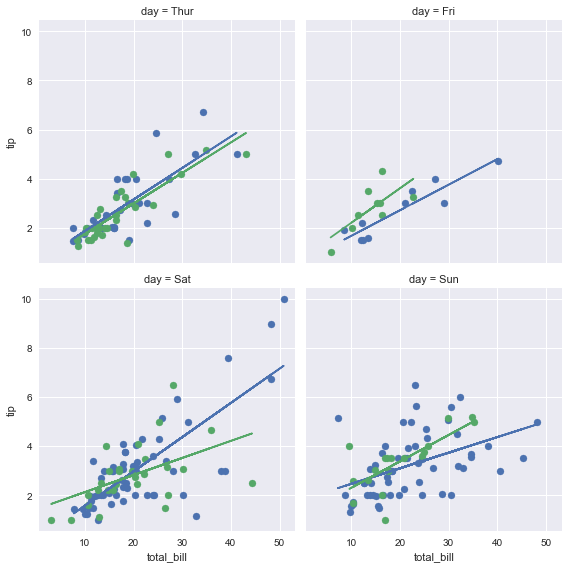

In [23]:
fg = sns.FacetGrid(tips, col="day", hue='sex', height=4, col_wrap=2)
fg.map(regression, "total_bill", "tip")

The **FacetGrid** object contains pointers to all the axes so that we can manipulate them directly, if we wish

In [24]:
fg.axes

array([<AxesSubplot:title={'center':'day = Thur'}, ylabel='tip'>,
       <AxesSubplot:title={'center':'day = Fri'}>,
       <AxesSubplot:title={'center':'day = Sat'}, xlabel='total_bill', ylabel='tip'>,
       <AxesSubplot:title={'center':'day = Sun'}, xlabel='total_bill'>],
      dtype=object)

So if we want to add an extra line to one of the subplots we can easily do:

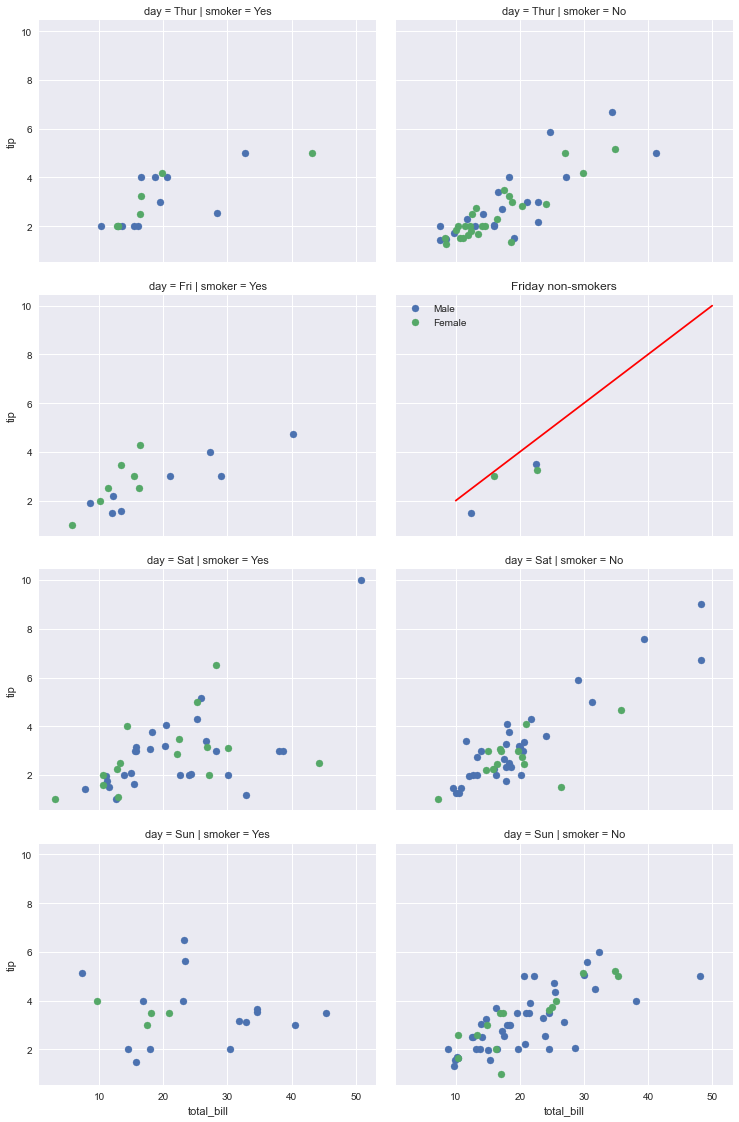

In [25]:
fg = sns.FacetGrid(tips,
            col="smoker", row="day", hue="sex", 
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )
fg.map(plt.scatter, "total_bill", "tip")

# call methods directly on the axis object
fg.axes[1][1].plot([10, 50], [2, 10], 'r-') 
fg.axes[1][1].set_title('Friday non-smokers')
fg.axes[1][1].legend()
plt.gcf().set_size_inches(11, 16)

## Pair Plot

This generates a matrix of plots looking at all combinations of numerical columns

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

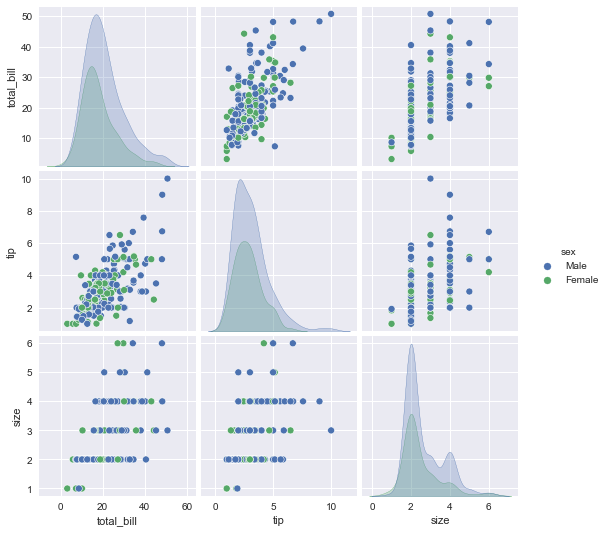

In [28]:
pp = sns.pairplot(tips, hue="sex")

Pairplots return a **PairGrid** object, a specialized version of **FacetGrid**. We can still access the individual axis objects in the same way as before

In [29]:
pp.axes

array([[<AxesSubplot:ylabel='total_bill'>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='tip'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='total_bill', ylabel='size'>,
        <AxesSubplot:xlabel='tip'>, <AxesSubplot:xlabel='size'>]],
      dtype=object)

## Joint plot

**jointplot** is also a useful way of exploring datasets. It makes a scatter plot in the center and histograms on the margins

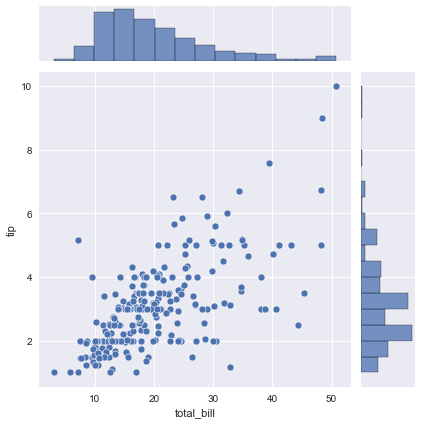

In [30]:
jp = sns.jointplot("total_bill", "tip", data=tips)

**Joint plots** return a **JointGrid** object that is slightly different in structure than a **FacetGrid**. To access the center plot you use **jp.ax_joint** and **jp.ax_marg_x**, **jp.ax_marg_y** for the x and y margin plots

In [31]:
print(type(jp.ax_joint))
print(type(jp.ax_marg_x))
print(type(jp.ax_marg_y))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


You can also use the jointplot to visualize the point density

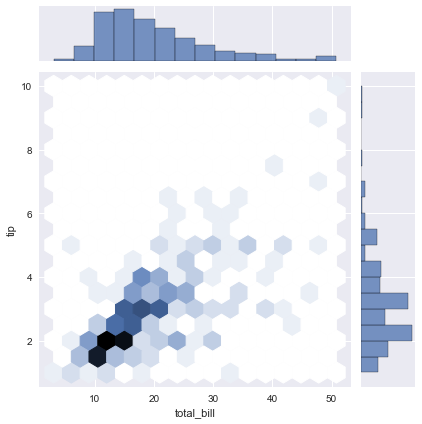

In [32]:
jp = sns.jointplot("total_bill", "tip", data=tips, kind="hex")

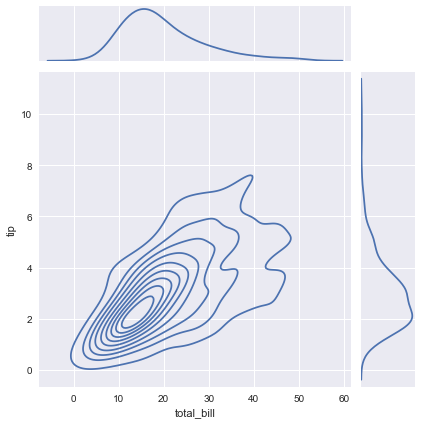

In [33]:
jp = sns.jointplot("total_bill", "tip", data=tips, kind="kde")

We've only just tapped into the seaborn capabilities. It is able to do much more and you should explore the excellent online documentation

## Distribution plot

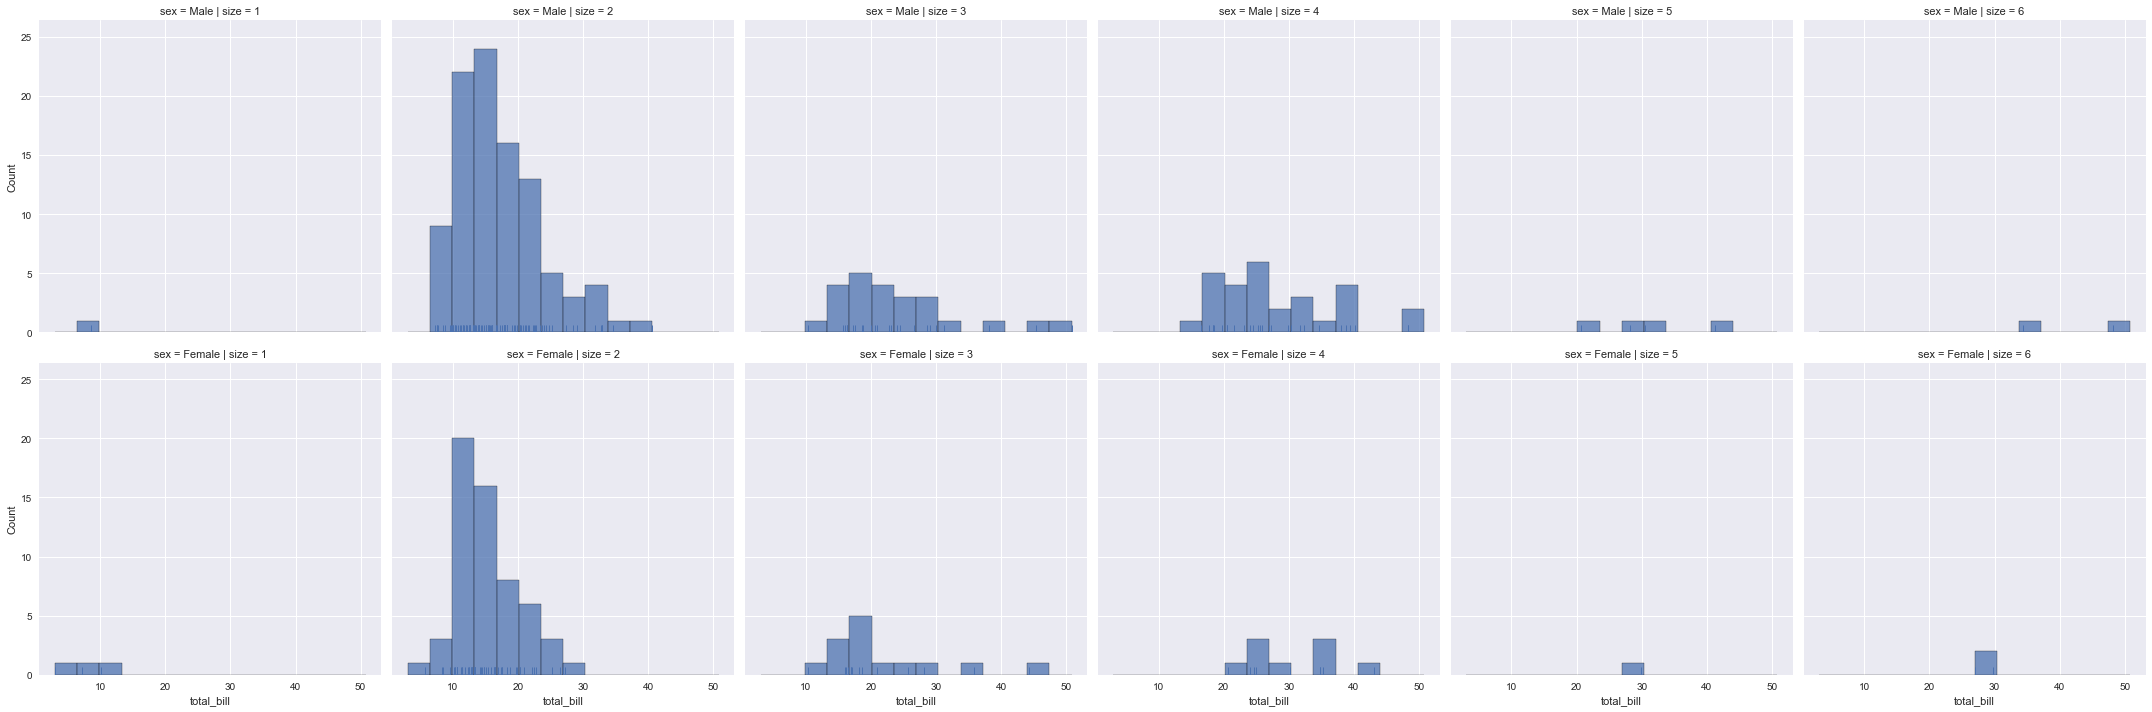

In [34]:
dp = sns.displot(data=tips, x="total_bill", row="sex", col="size", kind="hist", rug=True)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>